In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving car_price_prediction.csv to car_price_prediction.csv


**Introduction:** Some people freak out when they go to the dealership and look at the sticker price on the car. Well, you could look it up online, but some of those prices aren't that accurate. What if we could predict this with data?


I want to predict the price of a car based on its manufacturer, model, production year, and engine volume.

### What is Regression
Linear Regression is a method of fitting a line to the data to model it as closely as possible. It’s often used for problems like housing price prediction, where the goal is to predict continuous values.


### Preprocessing
for my data I first made sure to clean it before I do any anaylsis. I saw that some of the categories were objects when they shouldn't be so i used regex to clean them up to make them what they should be.


In [ ]:
df = pd.read_csv('car_price_prediction.csv')
df.head()
print(df.isnull().sum())
df.dropna(inplace=True)
df.info()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel ty

In [ ]:
df = df[(df['Levy'] != '-') & (df['Mileage'] != '-')]
df.reset_index(drop=True, inplace=True)

df['Levy'] = df['Levy'].astype(str).str.replace(',', '').astype(int)

df['Mileage'] = df['Mileage'].astype(str).str.replace('km', '', case=False, regex=False)
df['Mileage'] = df['Mileage'].str.replace(',', '').astype(int)

### Data understanding
Next I made i looked for important correlations between the data. I made a heatmaps to see if any values were correlated with eachother. What I found was intresting as there was not any values correlated with each other. But I knew it wasnt broken because there was some speciles of dark red and blue scatted across the plot.

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13418 entries, 0 to 13417
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13418 non-null  int64  
 1   Price             13418 non-null  int64  
 2   Levy              13418 non-null  int64  
 3   Manufacturer      13418 non-null  object 
 4   Model             13418 non-null  object 
 5   Prod. year        13418 non-null  int64  
 6   Category          13418 non-null  object 
 7   Leather interior  13418 non-null  object 
 8   Fuel type         13418 non-null  object 
 9   Engine volume     13418 non-null  object 
 10  Mileage           13418 non-null  int64  
 11  Cylinders         13418 non-null  float64
 12  Gear box type     13418 non-null  object 
 13  Drive wheels      13418 non-null  object 
 14  Doors             13418 non-null  object 
 15  Wheel             13418 non-null  object 
 16  Color             13418 non-null  object

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

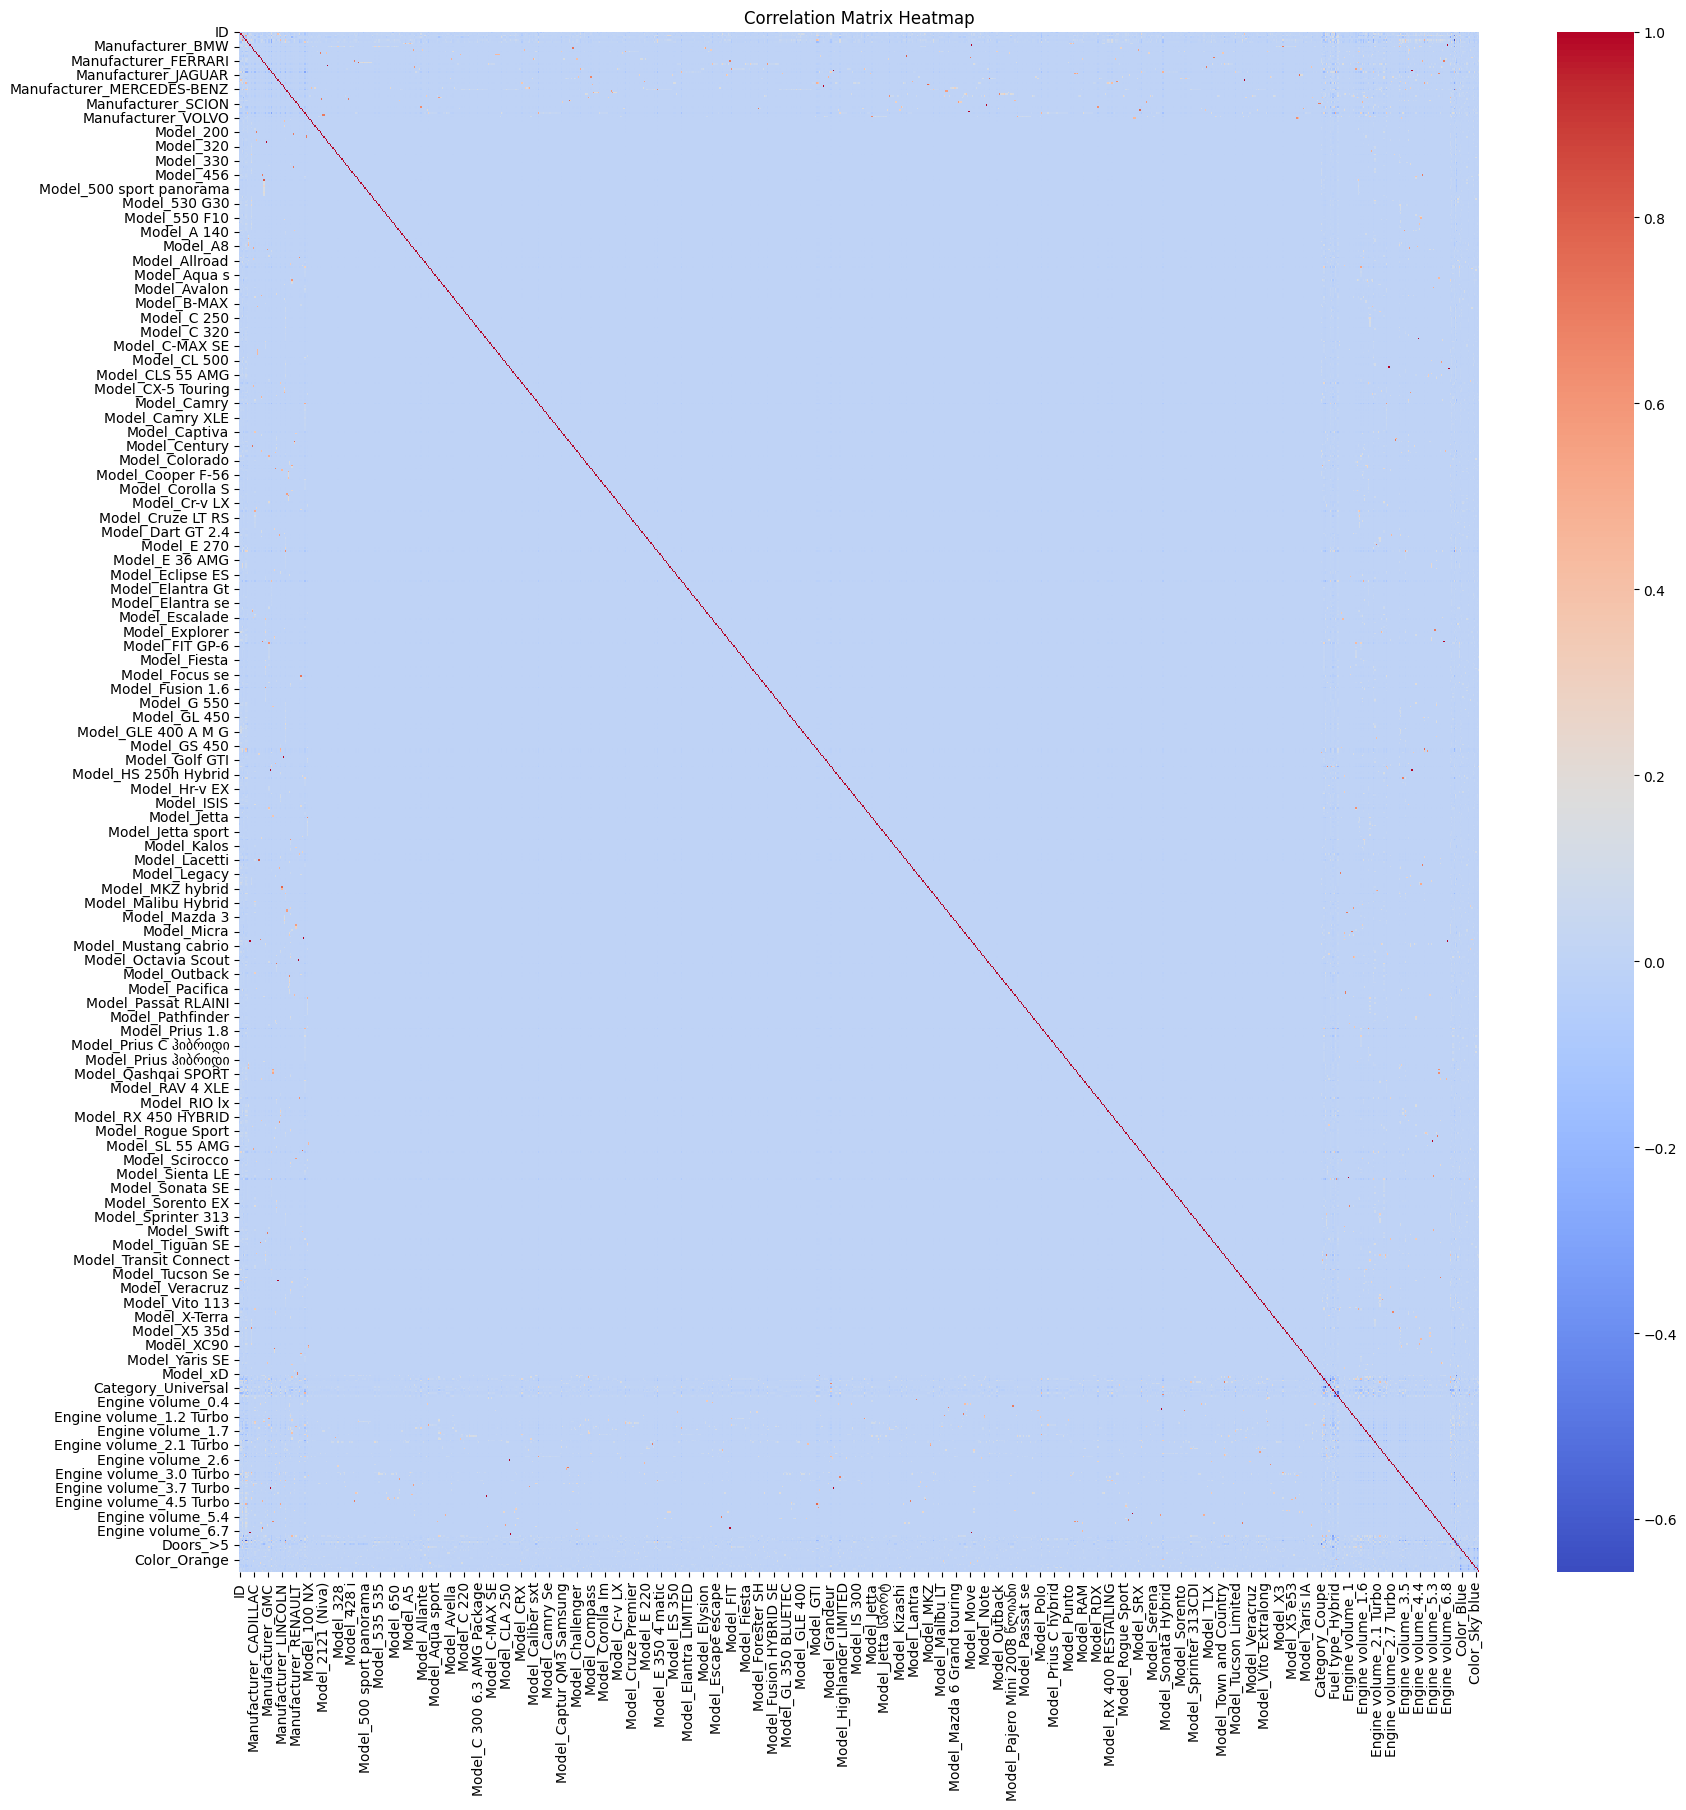

In [ ]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Experiment 1: Basic model
I made and tuned and tested a basic model on the data.

Mean Squared Error: 158265914.01
Root Mean Squared Error: 12580.38
R-squared Score: 0.47


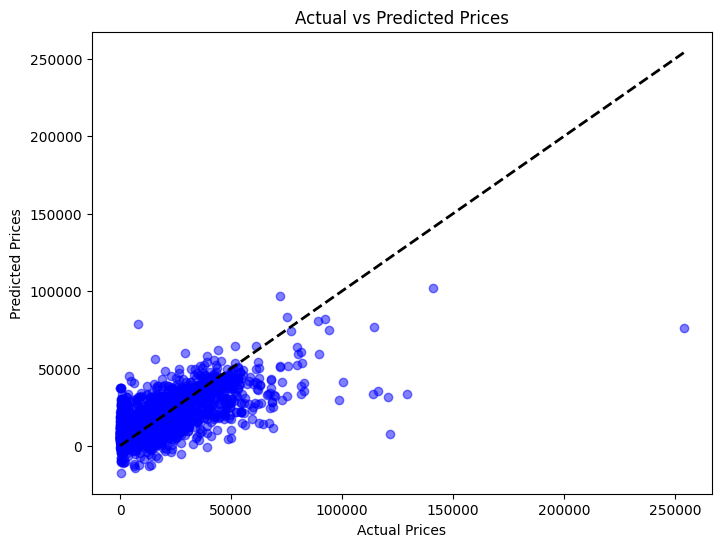

In [ ]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.2f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

A score of 0.47 is somewhat low. I feel that linear regression might not be the

---

best model for the data and there might be more complex patterns that linear regression cant capture.

*italicized text*### Experiment 2: Preproccessing Optimization

> Add blockquote


-[ Normalizing Distrbution](https://): By applying a log transformation to normalize the Price distribution, this can improve model performance by stabilizing the variance.
- Standardization: Scaling numerical features to have a mean of 0 and a standard deviation of 1, which a lot of machine learning algorithims like.



In [ ]:
pip install category_encoders

In [ ]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
import warnings


warnings.filterwarnings('ignore')

df = pd.read_csv('car_price_prediction.csv')

print("First few rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


First few rows of the dataset:
         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Lef

In [ ]:

# more advanced preprocessing
df.dropna(inplace=True)
print("\nAfter dropping missing values:")
print(df.isnull().sum())
df = df[(df['Levy'] != '-') & (df['Mileage'] != '-')]
print("\nAfter removing rows with '-' in 'Levy' and 'Mileage':")
print(df.shape)
df.reset_index(drop=True, inplace=True)
df['Levy'] = df['Levy'].str.replace(',', '').astype(int)
df['Mileage'] = df['Mileage'].str.replace('km', '', case=False, regex=False)
df['Mileage'] = df['Mileage'].str.replace(',', '').astype(int)
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '').astype(float)
print("\nData after cleaning 'Levy', 'Mileage', and 'Engine volume':")
print(df.head())



After dropping missing values:
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

After removing rows with '-' in 'Levy' and 'Mileage':
(13418, 18)

Data after cleaning 'Levy', 'Mileage', and 'Engine volume':
         ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS    RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET   Equinox        2011       Jeep   
2  45769185   3607   862         FORD    Escape        2011       Jeep   
3  45809263  11726   446        HONDA       FIT        2014  Hatchback   
4  45802912  39493   891      HYUNDAI  Santa FE        2016  

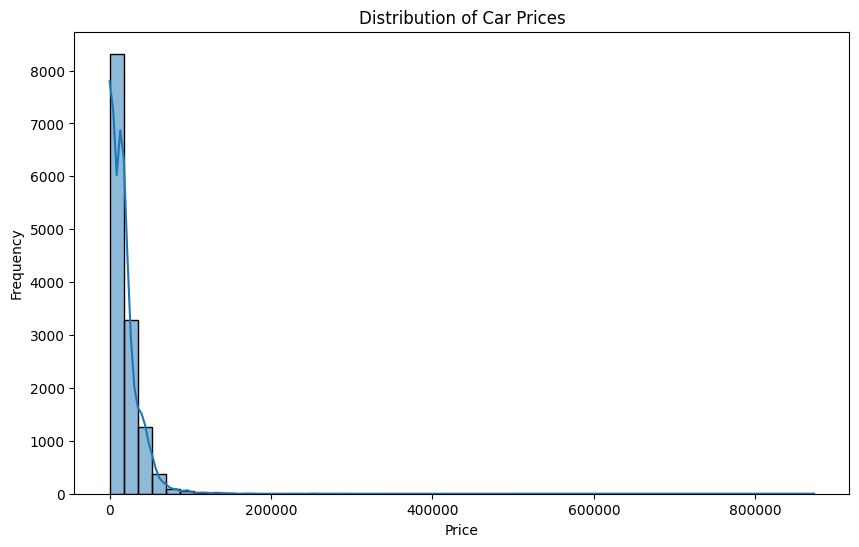

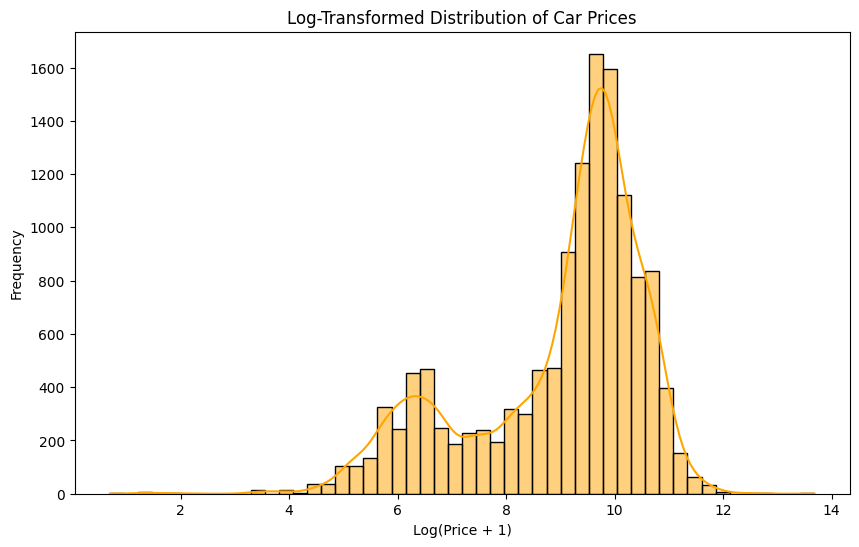

In [ ]:
# feature engineering +  Normalizing Distrbution of output
current_year = 2023
df['Car_Age'] = current_year - df['Prod. year']
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
df['Price_log'] = np.log1p(df['Price'])
plt.figure(figsize=(10,6))
sns.histplot(df['Price_log'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Distribution of Car Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()





In [ ]:
# Target encoding the labels
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Fuel type',
                    'Gear box type', 'Drive wheels', 'Doors', 'Wheel',
                    'Color', 'Leather interior']
target_encoder = TargetEncoder(cols=categorical_cols)
df_encoded = target_encoder.fit_transform(df, df['Price_log'])
print("\nData after Target Encoding:")
print(df_encoded.head())



Data after Target Encoding:
         ID  Price  Levy  Manufacturer      Model  Prod. year  Category  \
0  45654403  13328  1399      8.312937   7.714675        2010  9.132529   
1  44731507  16621  1018      9.074390   8.423695        2011  9.132529   
2  45769185   3607   862      8.676923   7.267300        2011  9.132529   
3  45809263  11726   446      9.116623   9.392128        2014  8.758195   
4  45802912  39493   891      9.643409  10.395588        2016  9.132529   

   Leather interior  Fuel type  Engine volume  ...  Cylinders  Gear box type  \
0          8.887026   8.162648            3.5  ...        6.0       8.838425   
1          9.549264   8.988914            3.0  ...        6.0       9.972032   
2          8.887026   8.162648            2.5  ...        4.0       8.838425   
3          8.887026   8.988914            1.3  ...        4.0       8.838425   
4          8.887026   9.585805            2.0  ...        4.0       8.838425   

   Drive wheels     Doors     Wheel    

In [ ]:
#standardizing int features
numerical_cols = ['Levy', 'Engine volume', 'Mileage', 'Car_Age']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print("\nData after Feature Scaling:")
print(df_encoded.head())


Data after Feature Scaling:
         ID  Price      Levy  Manufacturer      Model  Prod. year  Category  \
0  45654403  13328  1.065632      8.312937   7.714675        2010  9.132529   
1  44731507  16621  0.240688      9.074390   8.423695        2011  9.132529   
2  45769185   3607 -0.097084      8.676923   7.267300        2011  9.132529   
3  45809263  11726 -0.997809      9.116623   9.392128        2014  8.758195   
4  45802912  39493 -0.034293      9.643409  10.395588        2016  9.132529   

   Leather interior  Fuel type  Engine volume  ...  Cylinders  Gear box type  \
0          8.887026   8.162648       1.355187  ...        6.0       8.838425   
1          9.549264   8.988914       0.782311  ...        6.0       9.972032   
2          8.887026   8.162648       0.209434  ...        4.0       8.838425   
3          8.887026   8.988914      -1.165469  ...        4.0       8.838425   
4          8.887026   9.585805      -0.363442  ...        4.0       8.838425   

   Drive wheels

In [ ]:
# Define features and target variable
X = df_encoded.drop(['Price', 'Price_log'], axis=1)
y = df_encoded['Price_log']

print("\nFinal Feature Set (X):")
print(X.head())

print("\nTarget Variable (y):")


Final Feature Set (X):
         ID      Levy  Manufacturer      Model  Prod. year  Category  \
0  45654403  1.065632      8.312937   7.714675        2010  9.132529   
1  44731507  0.240688      9.074390   8.423695        2011  9.132529   
2  45769185 -0.097084      8.676923   7.267300        2011  9.132529   
3  45809263 -0.997809      9.116623   9.392128        2014  8.758195   
4  45802912 -0.034293      9.643409  10.395588        2016  9.132529   

   Leather interior  Fuel type  Engine volume   Mileage  Cylinders  \
0          8.887026   8.162648       1.355187 -0.009118        6.0   
1          9.549264   8.988914       0.782311 -0.008824        6.0   
2          8.887026   8.162648       0.209434 -0.009951        4.0   
3          8.887026   8.988914      -1.165469 -0.013720        4.0   
4          8.887026   9.585805      -0.363442 -0.010344        4.0   

   Gear box type  Drive wheels     Doors     Wheel     Color  Airbags  Turbo  \
0       8.838425      8.416332  8.979676  

Mean Squared Error: 1.53
Root Mean Squared Error: 1.24
R-squared Score: 0.36


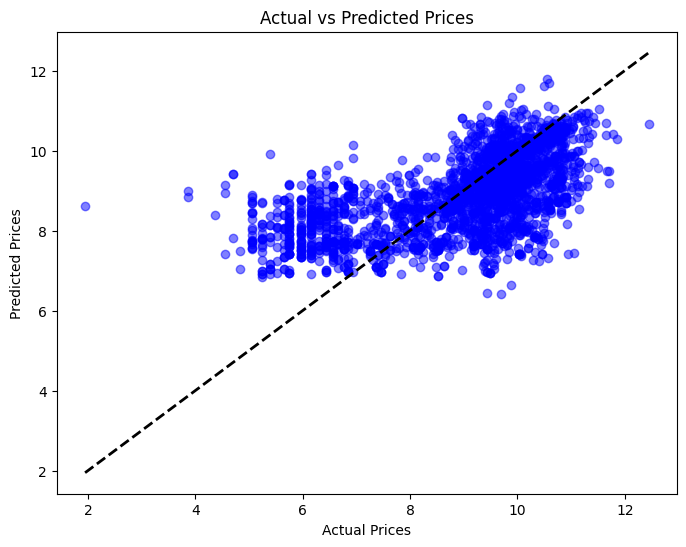

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.2f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

Normalizing features make the line fit better but its still bad.

### Experiment 3: Change Models




In [10]:
pip install category_encoders

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import TargetEncoder
import warnings


warnings.filterwarnings('ignore')
df = pd.read_csv('car_price_prediction.csv')
df.dropna(inplace=True)

df = df[(df['Levy'] != '-') & (df['Mileage'] != '-')]
df.reset_index(drop=True, inplace=True)
df['Levy'] = df['Levy'].str.replace(',', '').astype(int)
df['Mileage'] = df['Mileage'].str.replace('km', '', case=False, regex=False)
df['Mileage'] = df['Mileage'].str.replace(',', '').astype(int)
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '').astype(float)
current_year = 2023
df['Car_Age'] = current_year - df['Prod. year']

df['Price_log'] = np.log1p(df['Price'])

categorical_cols = ['Manufacturer', 'Model', 'Category', 'Fuel type',
                    'Gear box type', 'Drive wheels', 'Doors', 'Wheel',
                    'Color', 'Leather interior']
target_encoder = TargetEncoder(cols=categorical_cols)
df_encoded = target_encoder.fit_transform(df, df['Price_log'])

numerical_cols = ['Levy', 'Engine volume', 'Mileage', 'Car_Age']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


Decision Tree Regressor Performance:
R-squared Score: 0.9752
RMSE: 0.2435


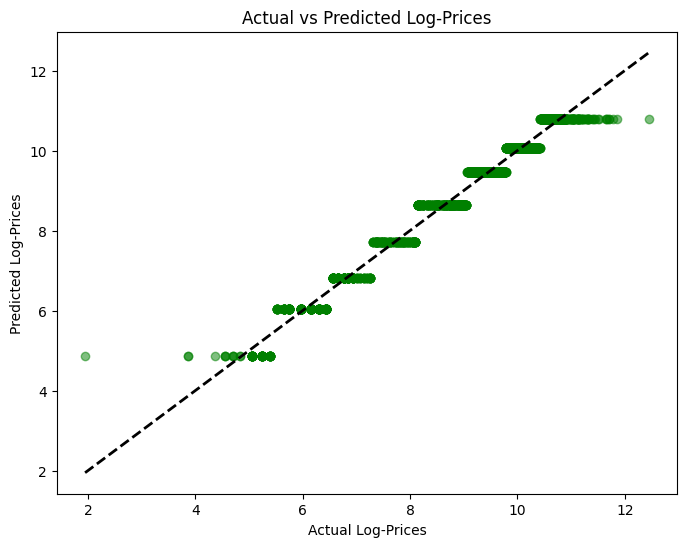

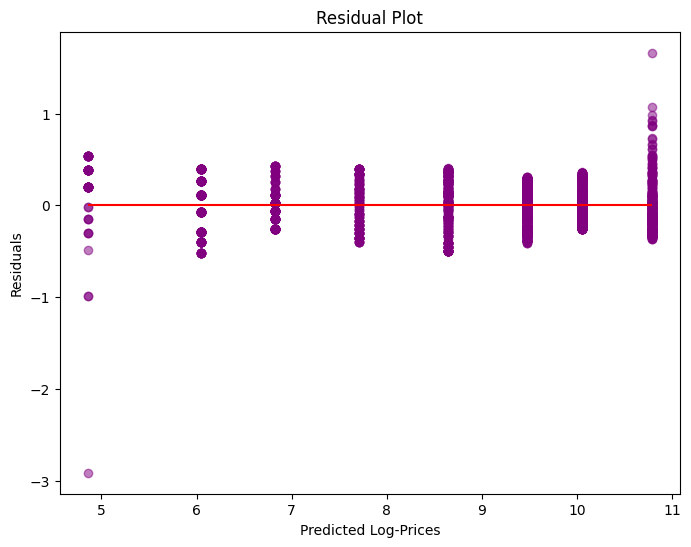

In [9]:
corr_matrix = df_encoded.corr()
corr_with_price = corr_matrix['Price_log'].abs()
selected_features = corr_with_price[corr_with_price > 0.1].index.tolist()
selected_features.remove('Price_log')

X = df_encoded[selected_features]
y = df_encoded['Price_log']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor Performance:")
print(f'R-squared Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log-Prices')
plt.ylabel('Predicted Log-Prices')
plt.title('Actual vs Predicted Log-Prices')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Log-Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()